Importing sucrose model

In [2]:
%run model_sucrose.ipynb

In [254]:
import numpy as np

In [5]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
#FSEOF optimizes the objective, while enforcing a secondary objective, we will be using surfactin as secondary objective
model.objective = model.reactions.BIOMASS_BS_10     
model.optimize()
fseof = FSEOF(model)
result = fseof.run(target = model.reactions.DM_surfactin_c)
df = result.data_frame

In [ ]:
from matplotlib import pyplot as plt
result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [6]:
# sorting 
df= df.sort_values([1], ascending = False)
 
# removing zeros from dataframe 
removed_zero = (df[1] != 0)
df = df.loc[removed_zero]

df.head()

,1,2,3,4,5,6,7,8,9,10
ATPS4r,60.542111,56.296142,52.050173,47.804205,43.349705,38.786574,34.223444,29.660314,25.097184,19.800501
CYOR3m,36.617956,34.167461,31.716966,29.266472,26.586310,23.791038,20.995767,18.200495,15.405223,12.216007
CYOO3,36.617956,34.167461,31.716966,29.266472,26.586310,23.791038,20.995767,18.200495,15.405223,12.216007
G3PD1ir,32.478156,30.121641,27.765126,25.408611,23.209202,21.080307,18.951411,16.822516,14.693621,12.082483
G3PD4,32.142434,29.817748,27.493063,25.168377,23.000797,20.903731,18.806665,16.709599,14.612533,12.033224


In [7]:
df['relative_change_in_flux'] = (df[10]-df[1])/df[1] #calculate relative change in flux: (new-old)/old

In [8]:
target_reactions_df = df[df['relative_change_in_flux'] > 1] #remove reactions that go to zero

In [10]:
df= df.sort_values(['relative_change_in_flux'], ascending = False)

In [11]:
df

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
GLYO1,0.057556,0.119820,0.182083,0.244346,0.306610,0.368873,0.431137,0.493400,0.555663,0.617927,9.736100
HOXPRx,-0.028778,-0.059910,-0.091042,-0.122173,-0.153305,-0.184437,-0.215568,-0.246700,-0.277832,-0.308963,9.736083
GLYCK,0.028778,0.059910,0.091042,0.122173,0.153305,0.184437,0.215568,0.246700,0.277832,0.308963,9.736083
GLXCBL,0.028778,0.059910,0.091042,0.122173,0.153305,0.184437,0.215568,0.246700,0.277832,0.308963,9.736083
PNTK,0.030928,0.061856,0.092784,0.123711,0.154639,0.185567,0.216495,0.247423,0.278351,0.309279,8.999968
...,...,...,...,...,...,...,...,...,...,...,...
HIBHr,1.672927,1.169485,0.666044,0.162602,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
PPAKr,1.672927,1.169485,0.666044,0.162602,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
ACOADH2,0.836463,0.584743,0.333022,0.081301,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
HACOADr,1.672927,1.169485,0.666044,0.162602,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000


In [12]:
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)
target_reactions_df= target_reactions_df.sort_values(['relative_change_in_flux'], ascending = False)

Text(0.5, 1.0, 'Reactions with a relative change in Flux > 80%')

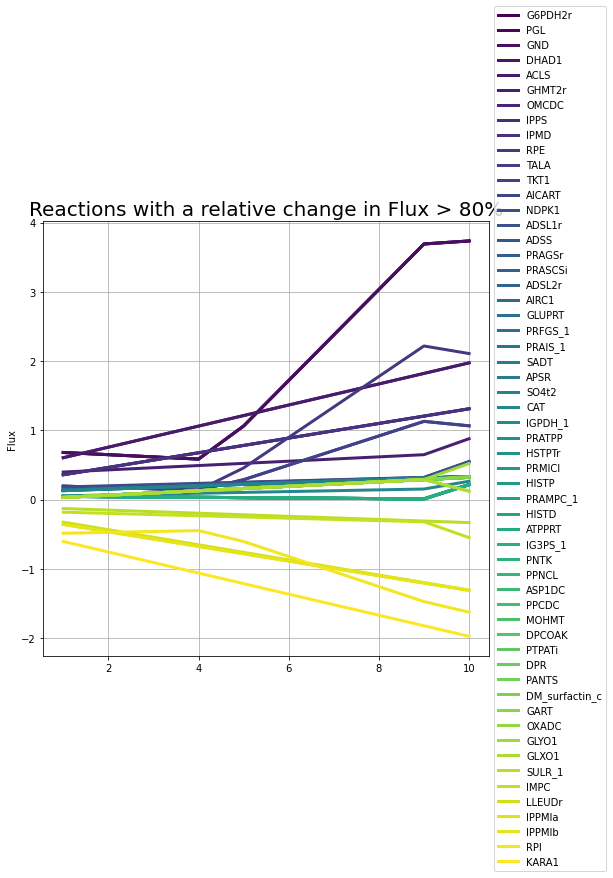

In [36]:
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.set_ylabel('Flux')
fig.set_xlabel('Enforced surfactin flux level')
fig.set_title('Relative changes in flux per reaction, size=20)

In [13]:
#lowest flux reactions
target_reactions_df.tail()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
ADSL1r,0.135133,0.156181,0.177230,0.198278,0.219327,0.240375,0.261423,0.282472,0.303520,0.324568,1.401841
ADSS,0.135133,0.156181,0.177230,0.198278,0.219327,0.240375,0.261423,0.282472,0.303520,0.324568,1.401841
GHMT2r,0.425112,0.486388,0.547664,0.608940,0.670216,0.731493,0.792769,0.854045,0.915321,0.976597,1.297270
MTHFC,0.316366,0.354092,0.391818,0.429544,0.467270,0.504996,0.542722,0.580448,0.618175,0.655901,1.073235
MTHFD,0.316366,0.354092,0.391818,0.429544,0.467270,0.504996,0.542722,0.580448,0.618175,0.655901,1.073235


In [15]:
#higest flux reactions
target_reactions_df.head(10)

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
GLYO1,0.057556,0.119820,0.182083,0.244346,0.306610,0.368873,0.431137,0.493400,0.555663,0.617927,9.736100
GLXCBL,0.028778,0.059910,0.091042,0.122173,0.153305,0.184437,0.215568,0.246700,0.277832,0.308963,9.736083
HOXPRx,-0.028778,-0.059910,-0.091042,-0.122173,-0.153305,-0.184437,-0.215568,-0.246700,-0.277832,-0.308963,9.736083
GLYCK,0.028778,0.059910,0.091042,0.122173,0.153305,0.184437,0.215568,0.246700,0.277832,0.308963,9.736083
DM_surfactin_c,0.030928,0.061856,0.092784,0.123711,0.154639,0.185567,0.216495,0.247423,0.278351,0.309279,9.000000
ASP1DC,0.030928,0.061856,0.092784,0.123711,0.154639,0.185567,0.216495,0.247423,0.278351,0.309279,8.999968
MOHMT,0.030928,0.061856,0.092784,0.123711,0.154639,0.185567,0.216495,0.247423,0.278351,0.309279,8.999968
DPCOAK,0.030928,0.061856,0.092784,0.123711,0.154639,0.185567,0.216495,0.247423,0.278351,0.309279,8.999968
DPR,0.030928,0.061856,0.092784,0.123711,0.154639,0.185567,0.216495,0.247423,0.278351,0.309279,8.999968
PNTK,0.030928,0.061856,0.092784,0.123711,0.154639,0.185567,0.216495,0.247423,0.278351,0.309279,8.999968


In [14]:
model.objective = model.reactions.BIOMASS_BS_10
model.optimize()

,fluxes,reduced_costs
EX_etha_e,0.000000e+00,-2.496739e-01
EX_drib_e,0.000000e+00,-7.882489e-18
EX_csn_e,0.000000e+00,-7.490218e-01
EX_5mtr_e,0.000000e+00,-7.490218e-01
EX_dtmp_e,0.000000e+00,-4.993479e-01
...,...,...
SP_1,0.000000e+00,-3.495435e+00
SP_2,0.000000e+00,-3.495435e+00
SP_3,0.000000e+00,-3.495435e+00
SP_4,0.000000e+00,-3.495435e+00


The targets with the highest relative flux changes are validated by making the flux found in FSEOF the upper or lower bound for down- and upregulation resepectively

In [16]:
#increase flux of possible upregulation target to at least the flux found in FSEOF
with model:
    print("normal biomass flux:" + str(model.slim_optimize()))
    print("normal GLYO1 flux:" + str(model.reactions.GLYO1.flux))
    print("normal surfactin flux: " + str(model.reactions.DM_surfactin_c.flux))
    model.reactions.GLYO1.lower_bound = 0.617927
    print("optimized biomass flux:" + str(model.slim_optimize()) )
    print("optimized GLYO1 flux:" + str(model.reactions.GLYO1.flux))
    print("optimized surfactin flux: " + str(model.reactions.DM_surfactin_c.flux))

normal biomass flux:0.6241848146320867
normal GLYO1 flux:0.0
normal surfactin flux: -1.2782035047998727e-17
optimized biomass flux:0.6241848146320863
optimized GLYO1 flux:0.617927
optimized surfactin flux: 1.6730980461229376e-16


In [17]:
with model:
    print("normal biomass flux:" + str(model.slim_optimize()))
    print("normal GLXCBL flux:" + str(model.reactions.GLXCBL.flux))
    print("normal surfactin flux: " + str(model.reactions.DM_surfactin_c.flux))
    model.reactions.GLXCBL.lower_bound = 0.308963
    print("optimized biomass flux:" + str(model.slim_optimize()) )
    print("optimized GLXCBL flux:" + str(model.reactions.GLXCBL.flux))
    print("optimized surfactin flux: " + str(model.reactions.DM_surfactin_c.flux))

normal biomass flux:0.6241848146320867
normal GLXCBL flux:2.9073965457371287e-15
normal surfactin flux: -1.2782035047998727e-17
optimized biomass flux:0.6241848146320861
optimized GLXCBL flux:0.308963
optimized surfactin flux: 2.224575449867374e-16


In [18]:
with model:
    print("normal biomass flux:" + str(model.slim_optimize()))
    print("normal HOXPRx flux:" + str(model.reactions.HOXPRx.flux))
    print("normal surfactin flux: " + str(model.reactions.DM_surfactin_c.flux))
    model.reactions.HOXPRx.upper_bound = -0.308963
    print("optimized biomass flux:" + str(model.slim_optimize()) )
    print("optimized HOXPRx flux:" + str(model.reactions.HOXPRx.flux))
    print("optimized surfactin flux: " + str(model.reactions.DM_surfactin_c.flux))
#actually down rehulation target

normal biomass flux:0.6241848146320866
normal HOXPRx flux:-1.8943180357666733e-15
normal surfactin flux: -1.2782035047998721e-17
optimized biomass flux:0.6241848146320864
optimized HOXPRx flux:-0.308963
optimized surfactin flux: 2.224575449867374e-16


In [19]:
with model:
    print("normal biomass flux:" + str(model.slim_optimize()))
    print("normal GLYCK flux:" + str(model.reactions.GLYCK.flux))
    print("normal surfactin flux: " + str(model.reactions.DM_surfactin_c.flux))
    model.reactions.GLYCK.lower_bound = 0.308963
    print("optimized biomass flux:" + str(model.slim_optimize()) )
    print("optimized GLYCK flux:" + str(model.reactions.GLYCK.flux))
    print("optimized surfactin flux: " + str(model.reactions.DM_surfactin_c.flux))

normal biomass flux:0.6241848146320866
normal GLYCK flux:0.0
normal surfactin flux: -1.2782035047998721e-17
optimized biomass flux:0.6241848146320862
optimized GLYCK flux:0.308963
optimized surfactin flux: 2.224575449867374e-16


In [20]:
with model:
    print("normal biomass flux:" + str(model.slim_optimize()))
    print("normal ASP1DC flux:" + str(model.reactions.ASP1DC.flux))
    print("normal surfactin flux: " + str(model.reactions.DM_surfactin_c.flux))
    model.reactions.ASP1DC.lower_bound = 0.309279
    print("optimized biomass flux:" + str(model.slim_optimize()) )
    print("optimized ASP1DC flux:" + str(model.reactions.ASP1DC.flux))
    print("optimized surfactin flux: " + str(model.reactions.DM_surfactin_c.flux))

normal biomass flux:0.6241848146320866
normal ASP1DC flux:-8.326672684688674e-17
normal surfactin flux: -1.2782035047998721e-17
optimized biomass flux:0.585575363575167
optimized ASP1DC flux:0.309279
optimized surfactin flux: 2.757387018722182e-17


The found targets do increase surfactin production when up- or downregulation of their flux is enforced, suggesting they might be valid targets.

Except for ASP1DC, which decreases biomass flux, no other investigated targets influenced biomass flux.

When the objective is changed to surfactin the found targets are already up- or downregulated further than the fluxes found in FSEOF, to investigate whether further up- or downregulation can increase surfactin production the upper or lower bound was changed to 1.5 times its current value.

In [21]:
with model:
    model.objective = model.reactions.DM_surfactin_c
    model.optimize()
    print("normal biomass flux:" + str(model.reactions.BIOMASS_BS_10.flux))
    print("normal GLYO1 flux:" + str(model.reactions.GLYO1.flux))
    print("normal surfactin flux: " + str(model.reactions.DM_surfactin_c.flux))
    model.reactions.GLYO1.lower_bound = model.reactions.GLYO1.flux*1.5
    print("optimized biomass flux:" + str(model.reactions.BIOMASS_BS_10.flux) )
    print("optimized GLYO1 flux:" + str(model.reactions.GLYO1.flux))
    print("optimized surfactin flux: " + str(model.reactions.DM_surfactin_c.flux))

with model:
    model.objective = model.reactions.DM_surfactin_c
    model.optimize()
    print("normal GLXCBL flux:" + str(model.reactions.GLXCBL.flux))
    model.reactions.GLXCBL.lower_bound = model.reactions.GLXCBL.flux*1.5
    print("optimized biomass flux:" + str(model.reactions.BIOMASS_BS_10.flux) )
    print("optimized GLXCBL flux:" + str(model.reactions.GLXCBL.flux))
    print("optimized surfactin flux: " + str(model.reactions.DM_surfactin_c.flux))
    
with model:
    model.objective = model.reactions.DM_surfactin_c
    model.optimize()
    print("normal HOXPRx flux:" + str(model.reactions.HOXPRx.flux))
    model.reactions.HOXPRx.upper_bound = model.reactions.HOXPRx.flux*1.5
    print("optimized biomass flux:" + str(model.reactions.BIOMASS_BS_10.flux) )
    print("optimized HOXPRx flux:" + str(model.reactions.HOXPRx.flux))
    print("optimized surfactin flux: " + str(model.reactions.DM_surfactin_c.flux))
    
with model:
    model.objective = model.reactions.DM_surfactin_c
    model.optimize()
    print("normal GLYCK flux:" + str(model.reactions.GLYCK.flux))
    model.reactions.GLYCK.lower_bound = model.reactions.GLYCK.flux*1.5
    print("optimized biomass flux:" + str(model.reactions.BIOMASS_BS_10.flux) )
    print("optimized GLYCK flux:" + str(model.reactions.GLYCK.flux))
    print("optimized surfactin flux: " + str(model.reactions.DM_surfactin_c.flux))

with model:
    model.objective = model.reactions.DM_surfactin_c
    model.optimize()
    print("normal ASP1DC flux:" + str(model.reactions.ASP1DC.flux))
    model.reactions.ASP1DC.lower_bound = model.reactions.ASP1DC.flux*1.5
    print("optimized biomass flux:" + str(model.reactions.BIOMASS_BS_10.flux) )
    print("optimized ASP1DC flux:" + str(model.reactions.ASP1DC.flux))
    print("optimized surfactin flux: " + str(model.reactions.DM_surfactin_c.flux))


normal biomass flux:0.02359327786447964
normal GLYO1 flux:1.2553983608028796
normal surfactin flux: 0.34364337675121626
optimized biomass flux:0.02359327786447964
optimized GLYO1 flux:1.2553983608028796
optimized surfactin flux: 0.34364337675121626
normal GLXCBL flux:0.6276991804014398
optimized biomass flux:0.02359327786447964
optimized GLXCBL flux:0.6276991804014398
optimized surfactin flux: 0.34364337675121626
normal HOXPRx flux:-0.6276991804014398
optimized biomass flux:0.02359327786447964
optimized HOXPRx flux:-0.6276991804014398
optimized surfactin flux: 0.34364337675121626
normal GLYCK flux:0.6276991804014398
optimized biomass flux:0.02359327786447964
optimized GLYCK flux:0.6276991804014398
optimized surfactin flux: 0.34364337675121626
normal ASP1DC flux:0.34364337675121626
optimized biomass flux:0.02359327786447964
optimized ASP1DC flux:0.34364337675121626
optimized surfactin flux: 0.34364337675121626


Up- and downregulation of targets after changing the objective to surfactin production does not lead to further increase of surfactin production, nor does this affect biomass.

In [22]:
with model:
    model.optimize()
    print("Biomass flux:")
    print(model.slim_optimize())
    print("Surfactin flux:")
    print(str(model.reactions.DM_surfactin_c.flux))
    model.reactions.GLYO1.lower_bound = 0.617927
    model.reactions.GLXCBL.lower_bound = 0.308963
    model.reactions.HOXPRx.upper_bound = -0.308963
    model.reactions.GLYCK.lower_bound = 0.308963
    model.reactions.ASP1DC.lower_bound = 0.309279
    print("Biomass flux after regulation:")
    print(model.slim_optimize()) 
    print("Surfactin flux after regulation:")
    print(str(model.reactions.DM_surfactin_c.flux))

Biomass flux:
0.6241848146320942
Surfactin flux:
0.0
Biomass flux after regulation:
0.5855753635751758
Surfactin flux after regulation:
3.0531133177191756e-16


Combining the regulation of the regulation targets does increase surfactin flux, more than using the targets seperately. Biomass flux is negatively influenced.

In [23]:
with model:
    model.objective = model.reactions.DM_surfactin_c
    model.optimize()
    print("Biomass flux:")
    print(model.reactions.BIOMASS_BS_10.flux)
    print("Surfactin flux:")
    print(model.reactions.DM_surfactin_c.flux)
    model.reactions.GLYO1.lower_bound = model.reactions.GLYO1.flux*1.5
    model.reactions.GLXCBL.lower_bound = model.reactions.GLXCBL.flux*1.5
    model.reactions.HOXPRx.upper_bound = model.reactions.HOXPRx.flux*1.5
    model.reactions.GLYCK.lower_bound = model.reactions.GLYCK.flux*1.5
    model.reactions.ASP1DC.lower_bound = model.reactions.ASP1DC.flux*1.5
    print("Biomass flux after regulation:")
    print(model.reactions.BIOMASS_BS_10.flux) 
    print("Surfactin flux after regulation:")
    print(model.reactions.DM_surfactin_c.flux)

Biomass flux:
0.02359327786447964
Surfactin flux:
0.3436433767512166
Biomass flux after regulation:
0.02359327786447964
Surfactin flux after regulation:
0.3436433767512166


Combining the regulations for when the objective is changed to surfactin does not influence surfactin or biomass flux. 